In [1]:
%%capture
!if [ -d dul_2021 ]; then rm -Rf dul_2021; fi
!git clone https://github.com/GrigoryBartosh/dul_2021
!pip install ./dul_2021

In [2]:
from dul_2021.utils.pr3_utils import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import IPython
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as opt
from torch.distributions.uniform import Uniform
from torch.distributions.normal import Normal
from torch.distributions.beta import Beta
from torch.distributions import MultivariateNormal

import copy

from scipy.stats import norm
from scipy.optimize import bisect
from tqdm import trange, tqdm_notebook

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
%%capture
!pip install torchdiffeq
from torchdiffeq import odeint_adjoint as odeint
import torchdiffeq

# Question 1: 2D Data


Dataset 1


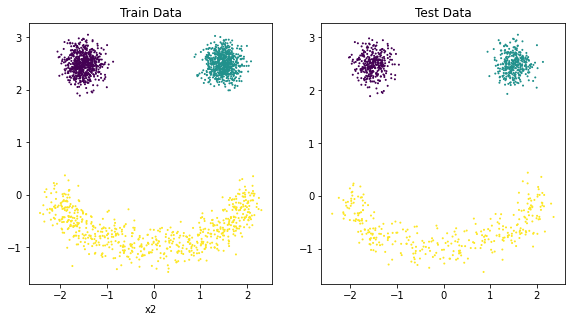

Dataset 2


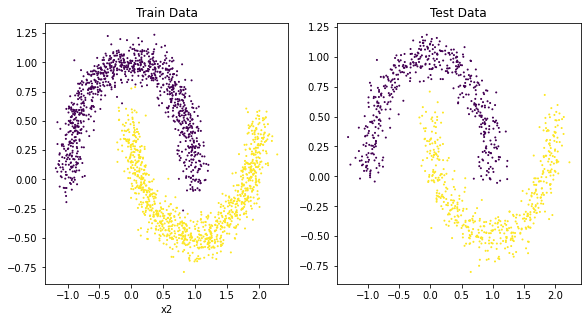

In [7]:
visualize_q1_data(dset_type=1)
visualize_q1_data(dset_type=2)

## Continious Normalazing Flow

Implement continious normalazing flow from [here](https://arxiv.org/pdf/1806.07366.pdf) (botom of page 4). We will be using following transformation parametrization of $\frac{dz(t)}{dt}$:

$\frac{dz(t)}{dt} = u \tanh(\omega^t z(t) + b) \Rightarrow \frac{\partial \log p(z(t))}{\partial z} = - u^t \frac{\partial h}{\partial z}$


Here $\omega, u$ have same dim as $z$ and $b$ is a scalar.

Parametrize $u, \omega, b$ with neural network with single input t. You may find it useful to icrease the 'width' of tansformation by performing m transformation and then averaging them.

## You will provide these deliverables

* Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves.
* Report the final test set performance of your final model
* Show a heatmap of the densities learned by your model
* Show what the training set looks like when mapped to the latent space.

## Solution

Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.



In [ ]:
class CNF(nn.Module):
  def __init__(self, input_dim, hidden_dim, width):
    super().__init__()
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.width = width
    self.block = width * input_dim

    seq_list = [nn.Linear(1, self.hidden_dim), 
                nn.Tanh(),
                nn.Linear(self.hidden_dim, self.hidden_dim),
                nn.Tanh(),
                nn.Linear(self.hidden_dim, (self.width * self.input_dim * 2) + self.width)]
    self.model = nn.Sequential(*seq_list)

    self.base_distribution = MultivariateNormal(torch.zeros(self.input_dim), torch.eye(self.input_dim))

  def foward(self, t, states):
    z = states[0]
    z.requires_grad_(True)
    param = self.model(t.unsqueeze(0)).squeeze()
    U = out[self.block : 2 * self.block].reshape(self.width, self.input_dim, 1)
    W = out[: self.block].reshape(self.width, 1, self.input_dim)
    B = ...
    z_ = z.unsqueeze(0).repeat(self.width, 1, 1)
    h = torch.tanh(z_.matmul(W) + B)
    dz_dt = h.matmul(U).mean(0)
    log_p_dt = self.get_log(dz_dt, z)
    return dz_dt, log_p_dt

  def get_log(self, d, z):
    pass

  def flow(self, ):
    pass

  def test(self, data):
    pass

  def nll(self, ):
    pass

  def fit(self, train_data, test_data):
    pass

  def probabil(self, ):
    pass



In [ ]:
def q1(train_data, test_data, dset_id):
  """
  train_data: An (n_train, 2) numpy array of floats in R^2
  test_data: An (n_test, 2) numpy array of floats in R^2
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
             used to set different hyperparameters for different datasets, or
             for plotting a different region of densities

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (?,) of probabilities with values in [0, +infinity). 
      Refer to the commented hint.
  - a numpy array of size (n_train, 2) of floats in [0,1]^2. This represents 
      mapping the train set data points through our flow to the latent space. 
  """
  
  """ YOUR CODE HERE """


  # heatmap
#   dx, dy = 0.025, 0.025
#   if dset_id == 1:  # face
#       x_lim = (-4, 4)
#       y_lim = (-4, 4)
#   elif dset_id == 2:  # two moons
#       x_lim = (-1.5, 2.5)
#       y_lim = (-1, 1.5)
#   y, x = np.mgrid[slice(y_lim[0], y_lim[1] + dy, dy),
#                   slice(x_lim[0], x_lim[1] + dx, dx)]
#   mesh_xs = torch.FloatTensor(np.stack([x, y], axis=2).reshape(-1, 2))
#   densities = np.exp(model.log_prob(mesh_xs).cpu().detach().numpy())

  # latents


### Results

Once you've implemented `q1`, execute the cells below to visualize and save your results



Final Test Loss: 1.3976


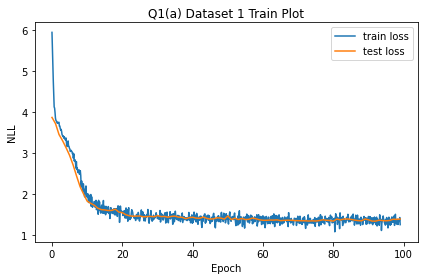

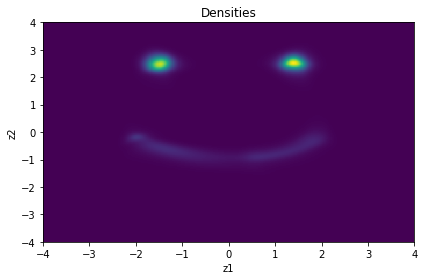

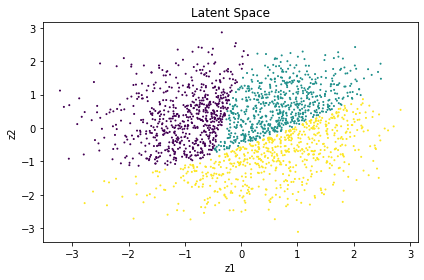

In [ ]:
q1_save_results(1, 'a', q1)

Final Test Loss: 1.1657


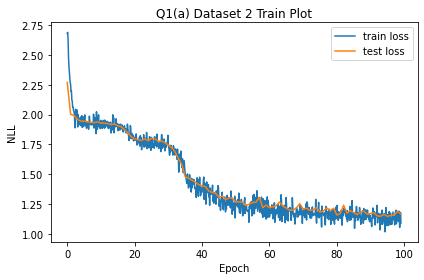

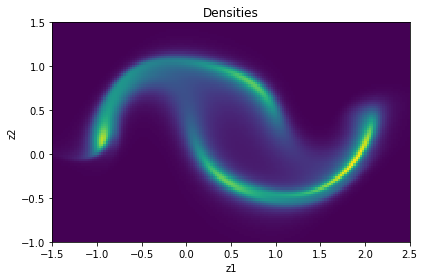

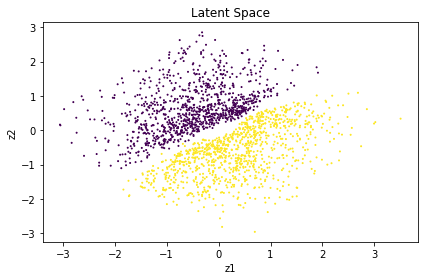

In [ ]:
q1_save_results(2, 'a', q1)

# Question 2: Hutchinson's trace estimator

Implement CNF with Hutchinson trace estimator.

## You will provide these deliverables

* Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves.
* Report the final test set performance of your final model


## Solution

Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
class Hutchinson_CNF(CNF):
  pass

In [ ]:
def q2(train_data, test_data):
  """
  train_data: An (n_train, 10) numpy array of floats in R^10
  test_data: An (n_test, 10) numpy array of floats in R^10
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
             used to set different hyperparameters for different datasets, or
             for plotting a different region of densities

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  """
  
  """ YOUR CODE HERE """


### Results

Once you've implemented `q2`, execute the cells below to visualize and save your results



In [ ]:
q2_save_results(q2)

# Bonus 3: CNF

Implement CNF with Hutchinson trace estimator and bottleneck trick

## You will provide these deliverables

* Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves.
* Report the final test set performance of your final model


## Solution

Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
def b3(train_data, test_data):
  """
  train_data: An (n_train, 10) numpy array of floats in R^10
  test_data: An (n_test, 10) numpy array of floats in R^10
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
             used to set different hyperparameters for different datasets, or
             for plotting a different region of densities

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  """
  
  """ YOUR CODE HERE """


### Results

Once you've implemented `b3`, execute the cells below to visualize and save your results



In [ ]:
q2_save_results(b3)